# Johns Hopkins University COVID-19 data viewer
Reads the csv data available from here: https://github.com/CSSEGISandData/COVID-19
Direct link to one of the CSV files: https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

Useful methods of the covidData class:
 - loadData(path): parses the CSV files stored in the given location and generates dictionaries with the relevant time series
 - getData(country, province = ''): returns a self-explanatory dict with data for specified country and province
 - getCountries(): returns names of all contries on which there have data
 - getProvinces(country): returns names of provinces for given country
 - estimateTrueCases(country, province = '', fatalityRate = 0.02, timeToDeath = 17.3): returns estimate of true case count based on fatality rate and average time from infection to death (https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca)
 
## TODO

 -  retrieve the data from directly from the web
 -  check that we do not do double-counting when generating totals for countries with multiple provinces. Custom summation might be needed. So far we only do custom summation only for the US. In other countries the 'total' is sum over all provinces. 

In [26]:
import sys
import importlib

sys.path.append("your/path/to/the/reader")
import readerJHU as reader
importlib.reload(reader)

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [27]:
# load the data
path = '/your/path/to/the/JHU/csv/files'
jhu = reader.CovidData()
jhu.loadData(path)

## Plot some data

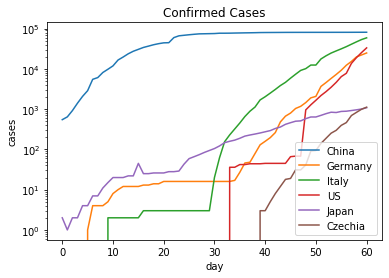

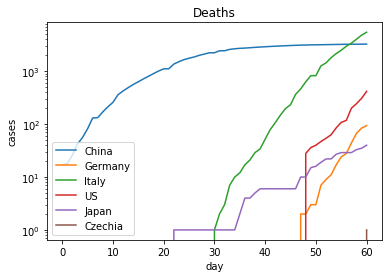

In [36]:
# plot confirmed cases for several countries
countries = ['China', 'Germany', 'Italy',  'US', 'Japan', 'Czechia']

for country in countries:
    data = jhu.getData(country)
    plt.semilogy(data['confirmed'], label = data['country'])

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('Confirmed Cases')
plt.show()

# plot numbers of dead for the same countries
for country in countries:
    data = jhu.getData(country)
    plt.semilogy(data['dead'], label = data['country'])

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('Deaths')
plt.show()

## True case estimate for the UK

Estimate true case count from the fatality count

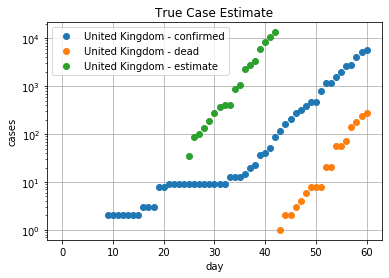

In [35]:
data = jhu.getData('United Kingdom')
estimate = jhu.estimateTrueCases('United Kingdom')

plt.semilogy(data['confirmed'],"o", label = data['country'] + ' - confirmed')
plt.semilogy(data['dead'],"o", label = data['country'] + ' - dead')
plt.semilogy(estimate['estimate'],"o", label = estimate['country'] + ' - estimate')

plt.legend()
plt.xlabel('day')
plt.ylabel('cases')
plt.title('True Case Estimate')
plt.grid()
plt.show()


In [19]:
# have a look at data for one country and province
data = jhu.getData('US', 'Alabama')
for key in data.keys():
    print(key)
    print(data[key])
    print()

country
US

province
Alabama

days
range(0, 61)

dates
['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20']

confirmed
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   5.   6.  12.  29.  